<a href="https://colab.research.google.com/github/GiorgiaVitanza/DataScience/blob/master/Homework8.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve
)

In [16]:
# Create an imbalanced dataset
n_sample = 10_000
X_imbalanced, y_imbalanced = make_classification(n_samples=n_sample, n_features=10, n_classes=2, weights=[0.95, 0.05], random_state=42)

In [17]:
#splitting
X_imb_train, X_imb_test, y_imb_train, y_imb_test = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.2, random_state=42
)

# Train a logistic regression model on the imbalanced dataset
lr_imbalanced = LogisticRegression(random_state=42)
lr_imbalanced.fit(X_imb_train, y_imb_train)

# Train a Random Forest classifier on the imbalanced dataset
rf_imbalanced = RandomForestClassifier(random_state=42)
rf_imbalanced.fit(X_imb_train, y_imb_train)

RandomForestClassifier(random_state=42)

In [18]:
# Generate predictions and probabilities
y_lr_pred = lr_imbalanced.predict(X_imb_test)
y_lr_prob = lr_imbalanced.predict_proba(X_imb_test)[:, 1]

y_rf_pred = rf_imbalanced.predict(X_imb_test)
y_rf_prob = rf_imbalanced.predict_proba(X_imb_test)[:, 1]


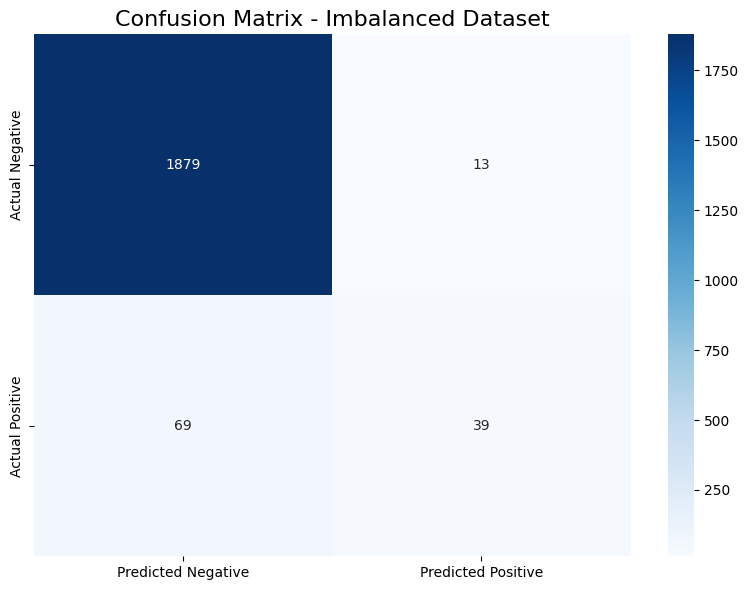

True Positives (TP): 39
False Positives (FP): 13
True Negatives (TN): 1879
False Negatives (FN): 69


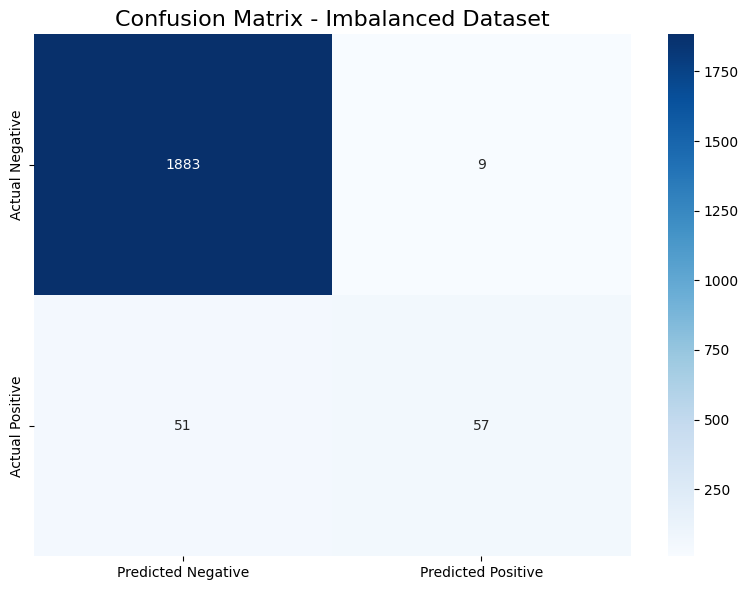

True Positives (TP): 57
False Positives (FP): 9
True Negatives (TN): 1883
False Negatives (FN): 51


In [19]:
def plot_confusion_matrix(y_true, y_pred, title,n_sample):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Extract values for annotation
    tn, fp, fn, tp = cm.ravel()

    # Create a heatmap visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])

    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

    # Print TP, FP, TN, FN values
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")

# Plot confusion matrices for both datasets
plot_confusion_matrix(y_imb_test, y_lr_pred, "Confusion Matrix - Imbalanced Dataset",n_sample)
plot_confusion_matrix(y_imb_test, y_rf_pred, "Confusion Matrix - Imbalanced Dataset",n_sample)

In [20]:
#Calculate precision
lr_precision = precision_score(y_imb_test, y_lr_pred)
rf_precision = precision_score(y_imb_test, y_rf_pred)

print(f"Logistic Regression precision: {lr_precision:.2f}")
print(f"Random Forest precision: {rf_precision:.2f}")



# Calculate recall
lr_recall = recall_score(y_imb_test, y_lr_pred)
rf_recall = recall_score(y_imb_test, y_rf_pred)

print(f"Logistic Regression recall: {lr_recall:.2f}")
print(f"Random Forest recall: {rf_recall:.2f}")

# Calculate F1 score
lr_f1 = f1_score(y_imb_test, y_lr_pred)
rf_f1 = f1_score(y_imb_test, y_rf_pred)


print(f"Logistic Regression F1 score: {lr_f1:.2f}")
print(f"Random Forest F1 score: {rf_f1:.2f}")

Logistic Regression precision: 0.75
Random Forest precision: 0.86
Logistic Regression recall: 0.36
Random Forest recall: 0.53
Logistic Regression F1 score: 0.49
Random Forest F1 score: 0.66


Comparing to the results of bitest, in this case the f1 score is greater both for Logistic regression and Random forest classifier. The random forest model has a greater precision than Logistic Regression and both are greater than the bitest case. As regard the recall is greater for the random forest model and is smaller than the bitest case. We can conclude that the model used for the bitest is different or in the dataset there are other information about the features to have different results.